# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 19

# Logistics

* Pushed the due date of HW#7 to Thursday, 11/14.
* HW#8 will be due on 11/26 (that can't be pushed back). 

# Per request: Opendap and all of its variants

You can directly subset a data without downloading the entire method this way. Just google it, and you should be able to figure it out. There are many examples out there. 

Here is the address for GPM's opendap server:

https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGHH.06/contents.html

There are lots of ways to do this. Here are a few examples. 

# Example 1: Opendap with xarray

Go [here](http://xarray.pydata.org/en/stable/io.html) for more info.

In [18]:
import xarray as xr
fp = xr.open_dataset('https://nomads.ncep.noaa.gov:9090/dods/hrrr/hrrr20191104/hrrr_sfc.t00z')

In [19]:
print(fp)

<xarray.Dataset>
Dimensions:             (lat: 1155, lev: 7, lon: 2503, time: 37)
Coordinates:
  * time                (time) datetime64[ns] 2019-11-04 ... 2019-11-05T12:00:00
  * lev                 (lev) float64 1e+03 925.0 850.0 700.0 500.0 300.0 250.0
  * lat                 (lat) float64 21.14 21.17 21.2 ... 52.56 52.59 52.61
  * lon                 (lon) float64 -134.1 -134.1 -134.0 ... -60.97 -60.94
Data variables:
    dptprs              (time, lev, lat, lon) float32 ...
    no4lftx180_0mb      (time, lat, lon) float32 ...
    apcpsfc             (time, lat, lon) float32 ...
    asnowsfc            (time, lat, lon) float32 ...
    bgrunsfc            (time, lat, lon) float32 ...
    capesfc             (time, lat, lon) float32 ...
    cape180_0mb         (time, lat, lon) float32 ...
    cape90_0mb          (time, lat, lon) float32 ...
    cape255_0mb         (time, lat, lon) float32 ...
    cfrzrsfc            (time, lat, lon) float32 ...
    cicepsfc            (time, lat, lon

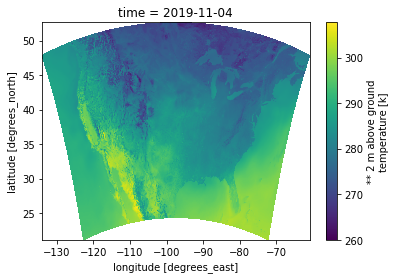

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plot the temperature for the first time step of the simulation
fp['tmp2m'][0,:,:].plot()
plt.show()

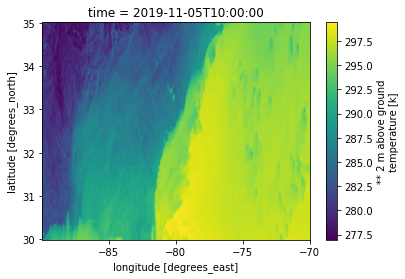

In [21]:
#We could also subset a single variable for the area that we want
data = fp['tmp2m'].sel(time=slice('2019-11-05T10:00:00', '2019-11-05T12:00:00'),
                lat=slice(30,35),
                lon=slice(-90,-70))
data[0,:,:].plot()
plt.show()

In [22]:
#Let's save this data locally
data.to_netcdf('../Workspace/hrrr_t2m.nc')

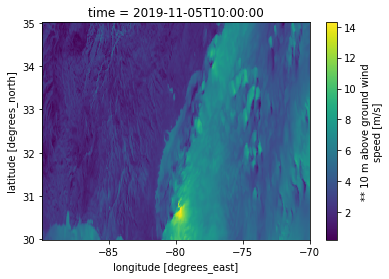

<xarray.Dataset>
Dimensions:  (lat: 184, lon: 684, time: 3)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-05T10:00:00 ... 2019-11-05T12:00:00
  * lat      (lat) float64 30.0 30.03 30.06 30.09 ... 34.91 34.94 34.97 35.0
  * lon      (lon) float64 -89.97 -89.94 -89.91 -89.88 ... -70.06 -70.03 -70.0
Data variables:
    apcpsfc  (time, lat, lon) float32 ...
    tmp2m    (time, lat, lon) float32 ...
    dpt2m    (time, lat, lon) float32 ...
    wind10m  (time, lat, lon) float32 ...
Attributes:
    title:        HRRR fcst starting from 00Z04nov2019, downloaded Nov 04 01:...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Tue Nov 05 02:51:54 GMT 2019 : imported by GrADS Data Serve...


In [24]:
#We could also download multiple variables at once
vars = ['apcpsfc','tmp2m','dpt2m','wind10m']
#We could also subset a single variable for the area that we want
data = fp[vars].sel(time=slice('2019-11-05T10:00:00', '2019-11-05T12:00:00'),
                lat=slice(30,35),
                lon=slice(-90,-70))
data['wind10m'][0,:,:].plot()
plt.show()
print(data)

In [25]:
#Save the data
data.to_netcdf('../Workspace/hrrr.nc')

# Example 2: Opendap with ncdump

Go [here](https://my.usgs.gov/confluence/pages/viewpage.action?pageId=537496478) for detailed examples for the USGS data portal.

In [ ]:
%%bash
nccopy -u http://cida.usgs.gov/thredds/dodsC/prism_v2?lon[0:1:1404],lat[0:1:620],time[0:1:24],ppt[0:1:24][0:1:620][0:1:1404] ../Workspace/prism_ppt.nc

* Many products (e.g., NASA data) will require an account to be able to download. 
* It makes the whole process more involved, but it is still fairly straightforward
* Just Google how to do it and iterate. 

In [ ]:
#Read the downloaded data via xarray
fp = xr.open_dataset('../Workspace/prism_ppt.nc')

In [ ]:
print(fp)

In [ ]:
fp['ppt'][0,:,:].plot()
plt.show()

# Other approaches to use opendap?

Go [here](https://www.esrl.noaa.gov/psd/data/gridded/using_dods.html) for many more options.